In [8]:
import numpy as np
import matplotlib.pyplot as plt
import json

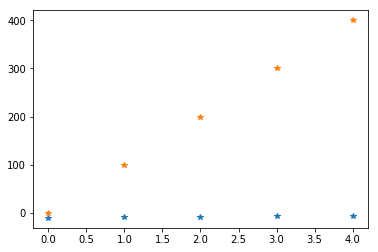

In [20]:

FID_epochs = []

for i in range(5):
    FID_epochs.append((i-10, i*100))
FID_epochs
with open('FID_epochs.txt', 'w') as outfile:
    json.dump(FID_epochs, outfile)
plt.plot(FID_epochs, '*')
plt.show()

In [21]:
FID_epochs[:]

[(-10, 0), (-9, 100), (-8, 200), (-7, 300), (-6, 400)]

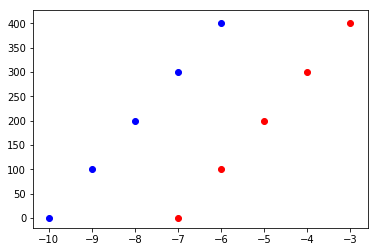

In [24]:
for pairs in  FID_epochs:
    plt.scatter(pairs[0],pairs[1], color='b')
    plt.scatter(pairs[0] + 3,pairs[1], color='r')
plt.show()

In [ ]:
# save real images as png, DONE!
# calculate the distribusion of the real images in the training set and save them in  `./datasets/train_mu_si/` using the following command: 
# python fid_score.py [Path_to_real_image] [Path_to_fake_image] --batch-size 1 --gpu 0 --load_np_name [dataset] --resize [Size]
# You can save the new dataset by replacing `--load_np_name [dataset]` with `--save_np_name [dataset]`.


In [1]:
import nibabel as nib
import numpy as np
import os
from PIL import Image 

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (16, 10)

from torchvision.utils import make_grid , save_image


def show_gen(generated, label=False, path='generated.png', title = 'synthesized'):
    plt.figure(figsize=(50,50))
    plt.axis("off")
    # plt.title("Images ")
    if label:
        plt.imshow(np.transpose(make_grid(generated, nrow=10, padding=2,    normalize=True).cpu(),(1,2,0)), cmap='hot')
        plt.title(title)
    else:
        # plt.imshow(np.transpose(make_grid(generated, nrow=10, padding=2,    normalize=True).cpu(),(3,2,1,0)), cmap='jet')
        plt.imshow(np.transpose(make_grid(generated, nrow=10, padding=2,    normalize=True).cpu(), (1, 2, 0)), cmap='jet')

        plt.title(title)
        # save_image(make_grid(generated,nrow=10, padding=2,    normalize=True).cpu(),fp=path)
        
import sys
sys.argv=['']
del sys

In [16]:
real_root_ph = '/data/sina/dataset/seb/mms2_processed/Philips/Image'
real_root_7T = '/data/sina/dataset/seb/SA_files_processed/Image'

def read_nibabel(data_root):
    image_list = sorted(os.listdir(os.path.join(data_root)))
    nib_subjects = {'subject': [], 'path':[] }
    for image in image_list:

        nib_subjects['subject'].append(nib.load(os.path.join(data_root, image)))
        nib_subjects['path'].append(os.path.join(data_root, image))
    print('the size of {} dataset is {} and the first image is {}'.format(data_root.split('/')[-2], len(nib_subjects['subject']),nib_subjects['path'][0] ))
    return nib_subjects


nib_subjects_ph = read_nibabel(real_root_ph)
nib_subjects_7T = read_nibabel(real_root_7T)



the size of Philips dataset is 47 and the first image is /data/sina/dataset/seb/mms2_processed/Philips/Image/014_SA_CINE.nii.gz
the size of SA_files_processed dataset is 53 and the first image is /data/sina/dataset/seb/SA_files_processed/Image/subject_0000_0.nii.gz


In [21]:
nib_subjects_ph['subject'][0].get_fdata().max()

1.0

In [25]:

def save_png(out_dir, nib_subject):
    os.makedirs(os.path.dirname(out_dir), exist_ok=True)
    for i in range(len(nib_subject['subject'])):
        one_subject = nib_subject['subject'][i].get_fdata().squeeze()
        for s in range(one_subject.shape[-1]):
            one_slice_PIL = Image.fromarray(np.uint8(one_subject[:,:,s]* 255)).convert('RGB')
            out_name = nib_subject['path'][i].split('/')[-1].split('.nii.gz')[0] + '_' + str(s) + '.png'
            # print(os.path.join(out_dir, out_name))
            os.makedirs(os.path.dirname(os.path.join(out_dir, out_name)), exist_ok=True)
            one_slice_PIL.save(os.path.join(out_dir, out_name), format='png')
    print('===== Done ! =====')







===== Done ! =====


In [26]:
our_dir_ph ='/data/sina/dataset/seb/mms2_processed/Philips/PNG'
our_dir_7T ='/data/sina/dataset/seb/SA_files_processed/PNG'
# save_png(our_dir_ph ,nib_subjects_ph)
save_png(our_dir_7T ,nib_subjects_7T)

===== Done ! =====


In [3]:

# ./fid_score.py '/data/sina/dataset/seb/mms2_processed/Philips/PNG' '/data/sina/dataset/seb/mms2_processed/Philips/PNG' --batch-size 50 --gpu 1 --save_np_name 'Philips'
# ./fid_score.py '/data/sina/dataset/seb/SA_files_processed/PNG' '/data/sina/dataset/seb/SA_files_processed/PNG' --batch-size 50 --gpu 1 --save_np_name 'SevenT'

./fid_score.py '/data/sina/dataset/seb/mms2_processed/Philips/PNG' '/data/sina/dataset/seb/SA_files_processed/PNG' --batch-size 50 --gpu 1 --load_np_name 'Philips'
# result:  288.16297275214305
./fid_score.py '/data/sina/dataset/seb/SA_files_processed/PNG' '/data/sina/dataset/seb/mms2_processed/Philips/PNG'  --batch-size 50 --gpu 1 --load_np_name 'SevenT'
# FID:  288.16297255658014

/bin/bash: ./fid_score.py: No such file or directory


In [ ]:
# Evaluating the models by calculating the FID score
# 1) load the desired model and the validation dataset
# 2) generate fake images and save them under ./images/synthesized_image/model/
# 3) read the generated data: fake_path = pathlib.Path(os.path.join(web_dir, 'images/synthesized_image/')) # files = list(fake_path.glob('*.jpg')) + list(fake_path.glob('*.png'))
# 4) calculate statistics: m1, s1 = calculate_activation_statistics(files, eval_model, 1, opt.eval_dims, True, images=None)
# 5) calculate FID: fid_value = calculate_frechet_distance(m0, s0, m1, s1)
# # process for calculate FID scores
    # from inception import InceptionV3
    # from fid_score import *
    # import pathlib
    # # define the inceptionV3
    # block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[opt.eval_dims]
    # eval_model = InceptionV3([block_idx]).cuda()
    # # load real images distributions on the training set
    # mu_np_root = os.path.join('datasets/train_mu_si',opt.dataset_mode,'m.npy')
    # st_np_root = os.path.join('datasets/train_mu_si',opt.dataset_mode,'s.npy')
    # m0, s0 = np.load(mu_np_root), np.load(st_np_root)

In [2]:
import os
from options.test_options import TestOptions
from data import create_dataset
from models import create_model
from util.visualizer import save_images
from util import html
import util.util as util

opt = TestOptions().parse()  # get test options
# hard-code some parameters for test
opt.num_threads = 0   # test code only supports num_threads = 1
opt.batch_size = 1    # test code only supports batch_size = 1
opt.serial_batches = True  # disable data shuffling; comment this line if results on randomly chosen images are needed.
opt.no_flip = True    # no flip; comment this line if results on flipped images are needed.
opt.display_id = -1   # no visdom display; the test code saves the results to a HTML file.


## train options
# opt.name = 'cmr_test_210719'
# opt.name = 'cmr_test_hinge_210720'
opt.name = 'cmr_test_original_cut_210721'
# opt.epoch = '25' # epoch 5 to 35
opt.dataset_mode = 'cmr'
opt.model = 'cut'
opt.nce_idt = True
opt.amp = False
opt.direction = 'BtoA'
opt.lambda_identity = 0.5
opt.valid_data = True
opt.image_dir_A = '/data/sina/dataset/seb/SA_files_processed/'
opt.image_dir_B = '/data/sina/dataset/seb/mms2_processed/Philips/'

opt.max_dataset_size = 5850 
opt.output_nc =  1 
opt.input_nc = 1 
opt.batch_size = 1
opt.num_patches = 16 

opt.display_freq = 50
opt.update_html_freq = 50
opt.save_epoch_freq = 10
opt.evaluation_freq = 500
# opt.normG = 'batch'
# opt.normD = 'batch'
# opt.netD = 'n_layers'   # with the basic discriminator i see GAN artifacts in the translated images and that might be a sign of the fact that the discriminator gets trained faster
# opt.netD = 'multi_scale'
# opt.n_layers_D = 4
opt.n_epochs  = 50
opt.n_epochs_decay = 50
opt.log_file = opt.checkpoints_dir + '/' + opt.name +  '/loss_log.txt'
opt.loss_freq = 1000
opt.results_dir = './results/synthesized_images/'



----------------- Options ---------------
                 CUT_mode: CUT                           
                      amp: False                         
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: placeholder                   
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
               easy_label: experiment_name               
                    epoch: latest                        
                     eval: False                         
        flip_equivariance: False                         
                  gpu_ids: 1                             
              image_dir_A: /data/sina/datasets/seb/SA_files_processed/
              image_dir_B: /data/sina/dataset/seb/mms2_processed/Philips/
 

In [3]:
dataset = create_dataset(opt)  # create a dataset given opt.dataset_mode and other options
print('the size of loaded dataset is {}'.format(len(dataset)))
# train_dataset = create_dataset(util.copyconf(opt, phase="train"))
model = create_model(opt)      # create a model given opt.model and other options
# create a webpage for viewing the results
web_dir = os.path.join(opt.results_dir, opt.name, '{}_{}'.format(opt.phase, opt.epoch))  # define the website directory
print('creating web directory', web_dir)
webpage = html.HTML(web_dir, 'Experiment = %s, Phase = %s, Epoch = %s' % (opt.name, opt.phase, opt.epoch))


dataset [CmrDataset] was created
the size of loaded dataset is 270
model [CUTModel] was created
creating web directory ./results/synthesized_images/cmr_test_original_cut_210721/test_latest


In [4]:
opt.num_test = 270
generated = []
generated_path = []

for i, data in enumerate(dataset):
    if i == 0:
        model.data_dependent_initialize(data)
        model.setup(opt)               # regular setup: load and print networks; create schedulers
        model.parallelize()
        if opt.eval:
            model.eval()
    if i >= opt.num_test:  # only apply our model to opt.num_test images.
        break
    model.set_input(data)  # unpack data from data loader
    model.test()           # run inference
    visuals = model.get_current_visuals()  # get image results
    generated.append(visuals)
    img_path = model.get_image_paths()     # get image paths
    generated_path.append(img_path)
    if i % 5 == 0:  # save images to an HTML file
        print('processing (%04d)-th image... %s' % (i, img_path))
    save_images(webpage, visuals, img_path, width=opt.display_winsize)
webpage.save()  # save the HTML

/data/sina/projects/code/CUT/.venv/lib/python3.7/site-packages/torchvision/transforms/functional.py:74: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  img = torch.from_numpy(np.array(pic, np.float32, copy=False))


loading the model from ./checkpoints/cmr_test_original_cut_210721/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 11.366 M
-----------------------------------------------
processing (0000)-th image... ['/data/sina/dataset/seb/mms2_processed/Philips/ImageValid/091_SA_CINE.nii.gz']
processing (0005)-th image... ['/data/sina/dataset/seb/mms2_processed/Philips/ImageValid/091_SA_CINE.nii.gz']
processing (0010)-th image... ['/data/sina/dataset/seb/mms2_processed/Philips/ImageValid/091_SA_CINE.nii.gz']
processing (0015)-th image... ['/data/sina/dataset/seb/mms2_processed/Philips/ImageValid/091_SA_CINE.nii.gz']
processing (0020)-th image... ['/data/sina/dataset/seb/mms2_processed/Philips/ImageValid/091_SA_CINE.nii.gz']
processing (0025)-th image... ['/data/sina/dataset/seb/mms2_processed/Philips/ImageValid/091_SA_CINE.nii.gz']
processing (0030)-th image... ['/data/sina/dataset/seb/mms2_processed/Philips/ImageValid/092_SA_CINE.nii.gz']
pro

In [5]:

# saving generated data
for i in range(len(generated_path)):
    # real_A = generated[i]['real_A'].squeeze().cpu().numpy()
    # real_B = generated[i]['real_B'].squeeze().cpu().numpy()
    fake_B = generated[i]['fake_B'].squeeze().cpu().numpy()
    fake_B_name = generated_path[i][0]
    fake_B_PIL = Image.fromarray(np.uint8(255*(fake_B+1)/2)).convert('RGB')
    out_dir = os.path.join(web_dir, 'fake_B')
    out_name = fake_B_name.split('/')[-1].split('.nii.gz')[0] + '_' + str(i) + '.png'
    os.makedirs(os.path.dirname(os.path.join(out_dir, out_name)), exist_ok=True)
    fake_B_PIL.save(os.path.join(out_dir, out_name), format='png')

print('===== saving done =====')

===== saving done =====


In [6]:
real_A = []
real_B = []
fake_B = []
for i in range(len(generated)):
    real_A.append(generated[i]['real_A'].squeeze(dim=0))
    real_B.append(generated[i]['real_B'].squeeze(dim=0))
    fake_B.append(generated[i]['fake_B'].squeeze(dim=0))

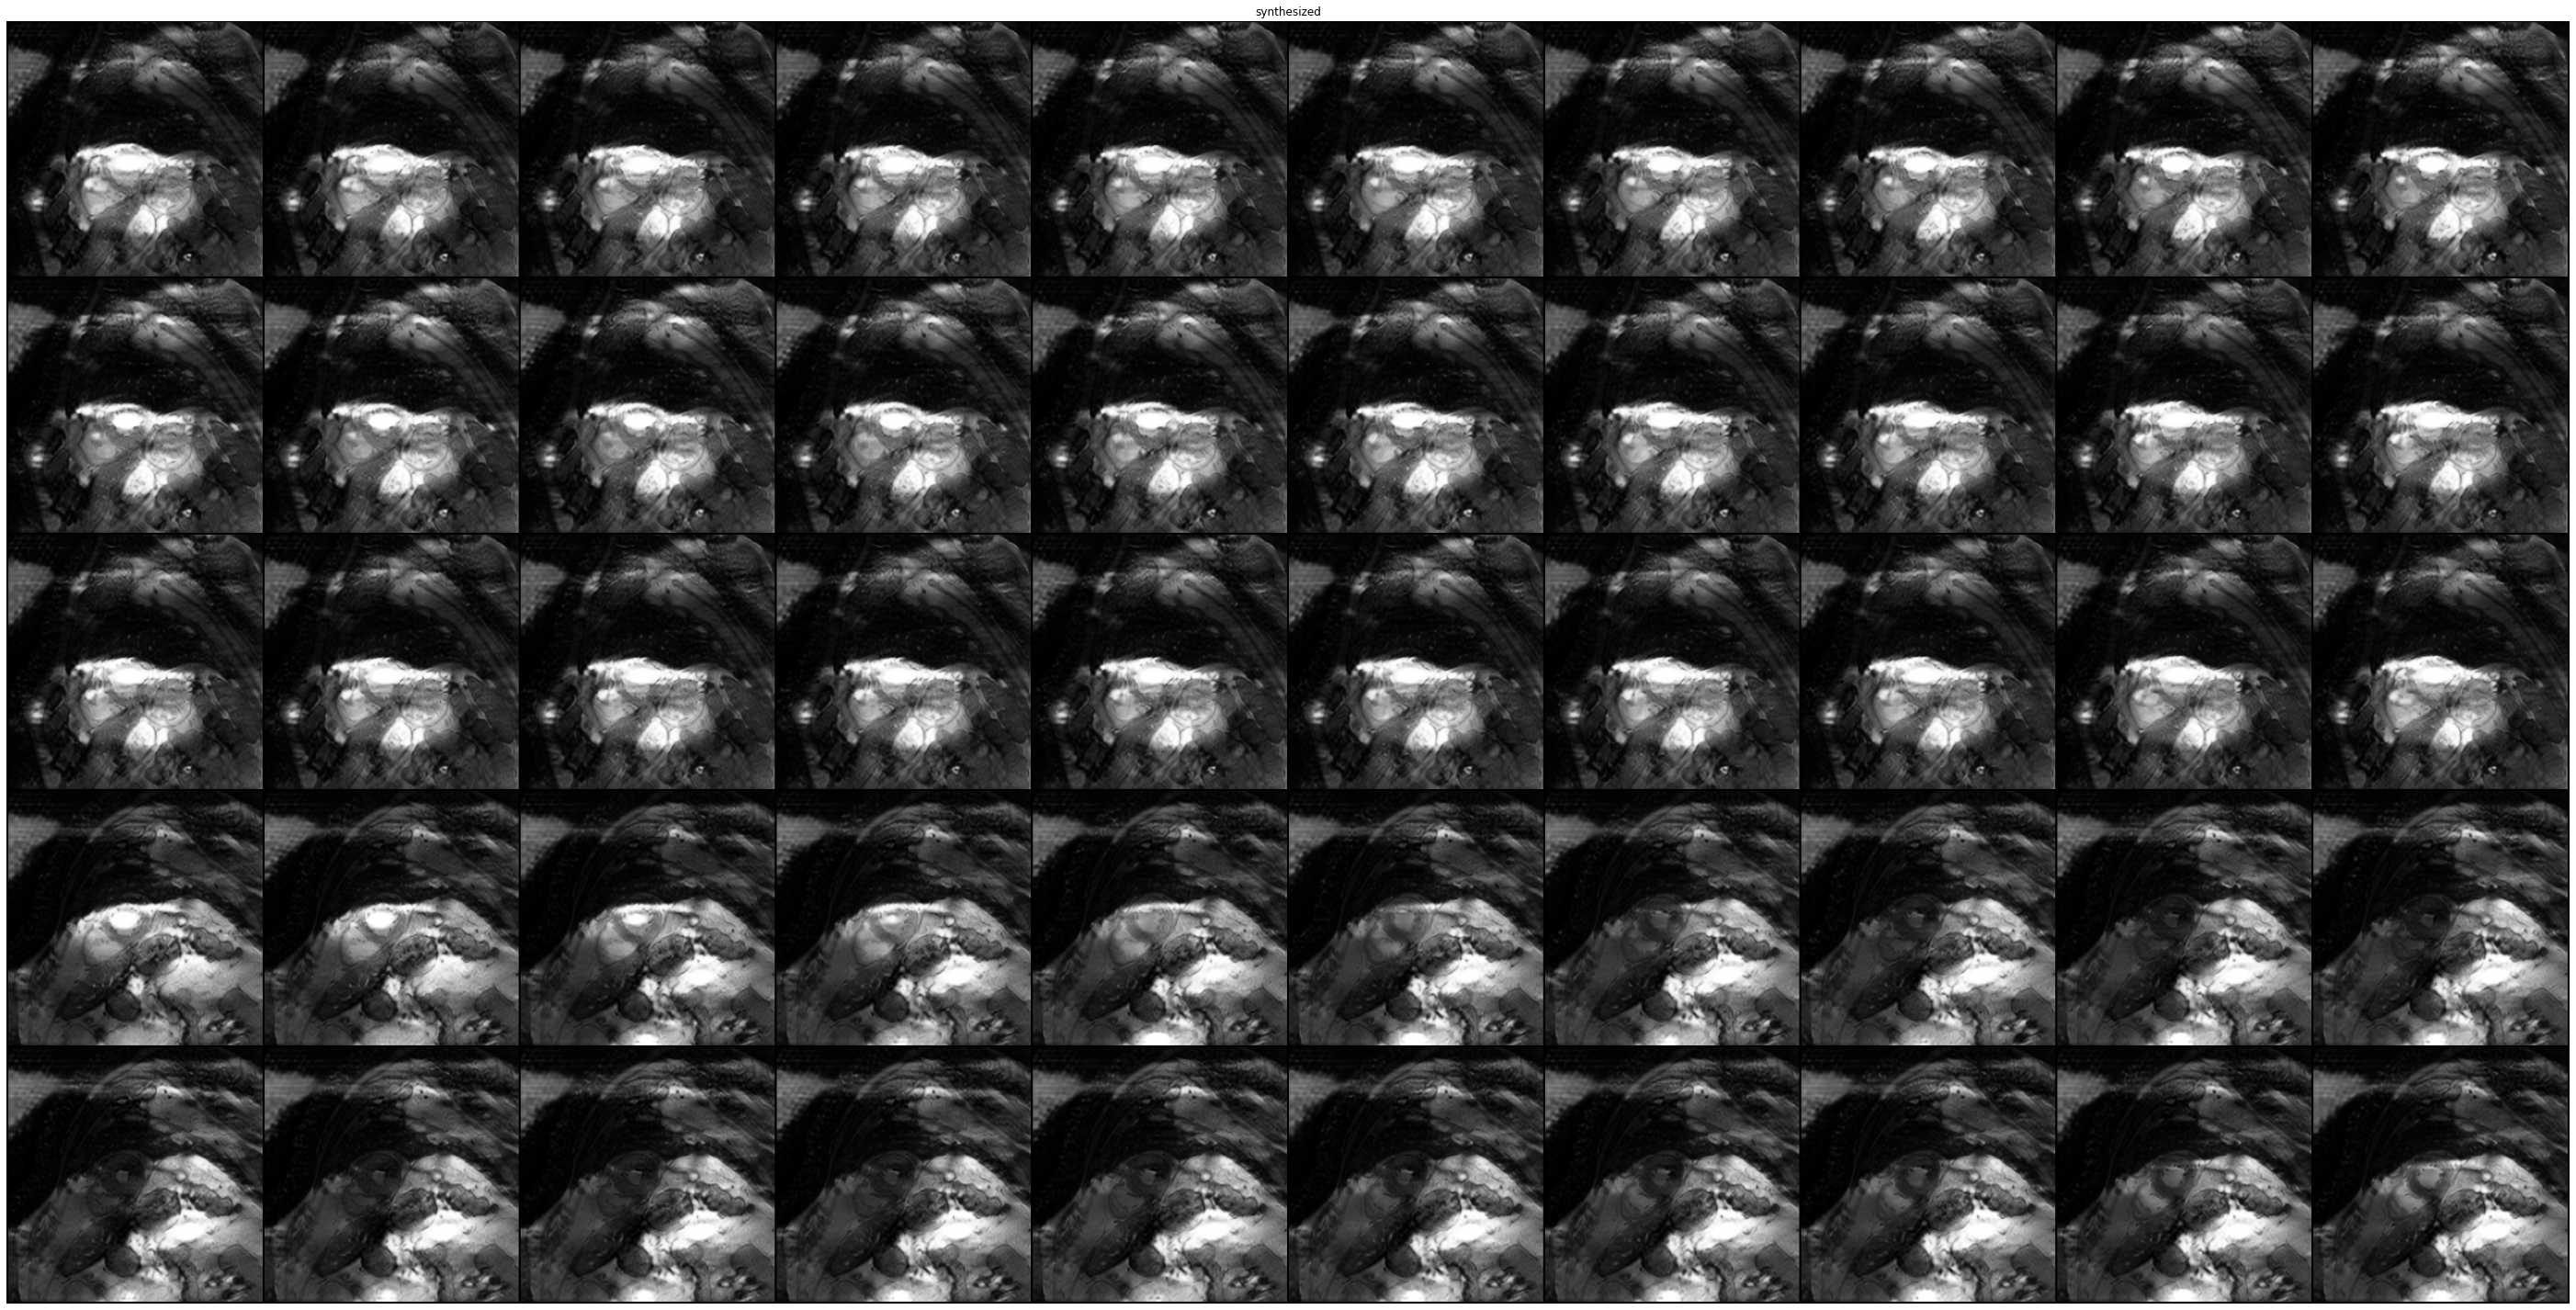

In [7]:
show_gen(fake_B)

In [6]:
# read the generated data: 
import pathlib
from fid_score import calculate_activation_statistics
# process for calculate FID scores
from inception import InceptionV3
from fid_score import *

opt.eval_dims = 2048
# define the inceptionV3
block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[opt.eval_dims]
eval_model = InceptionV3([block_idx]).cuda()
# load real images distributions on the training set
mu_np_root = os.path.join('datasets/train_mu_si/Philips/','m.npy')
st_np_root = os.path.join('datasets/train_mu_si/Philips/','s.npy')
m0, s0 = np.load(mu_np_root), np.load(st_np_root)



/data/sina/projects/code/CUT/.venv/lib/python3.7/site-packages/torchvision/models/inception.py:77: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)


In [7]:

fake_path = pathlib.Path(os.path.join(web_dir, 'fake_B')) #
files = list(fake_path.glob('*.jpg')) + list(fake_path.glob('*.png'))
# calculate statistics: 
m1, s1 = calculate_activation_statistics(files, eval_model, 1, opt.eval_dims, True, images=None)
# calculate FID: 
fid_value = calculate_frechet_distance(m0, s0, m1, s1)
print('the FID is {}'.format(fid_value))



100%|██████████| 270/270 [00:06<00:00, 39.87it/s]


the FID is 282.80817259843917


In [1]:
import numpy as np

a = np.array((3,2))
print(a)

[3 2]
